# Talari Shreya
## 220978324
## Roll.No 50
Section_A_Batch2
## Week_2_Benguluru_House

# Exercise 2 – Data Preprocessing and Visualization
Using the given BENGALURU HOUSE PRICES DATASET, perform data preprocessing and answer the following questions.

In [15]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv('Bengaluru_House_Prices.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


# Q-1 Compute the total number of missing values in the DataFrame

In [18]:
shouldDrop=[]
total_nans=0
for c in df.columns:
    na_cnt=0
    for b in pd.isnull(df[c]):
        if b:
            na_cnt+=1
    total_nans+=na_cnt
    total=df[c].count()
    shouldDrop.append((na_cnt / total) > 0.15)
total_nans

6201

# Q-2 Compute the percentage of missing values in the DataFrame. If a column has more than 15% missing values then drop (or remove) the column from the DataFrame

In [26]:
cells=df.shape[0]*df.shape[1]
nan=df.isnull().sum().sum()
percent=nan*100/cells
print(percent)
for (columnName, columnData) in df.iteritems():
    rows=df.shape[0]
    nan=df[columnName].isnull().sum()
    percent=nan*100/rows
    if percent>15:
        df.drop([columnName], axis=1)

4.808036376648426


# Q-3 Which column has the most number of missing values?

In [7]:
for i, c in enumerate(df.columns):
    if shouldDrop[i]:
        df.drop(c, axis=1)
print("Society col has most NaNs")
df.head()

Society col has most NaNs


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Q-4 drop (or remove) the rows containing the missing values in the location, size, and total_sqft columns

In [19]:
df=df[df.notnull()['location']]
df=df[df.notnull()['size']]
df=df[df.notnull()['total_sqft']]
len(df.index)

13303

In [20]:
print(len(df.index))
df=df[df['bath'] <= 5]
len(df.index)

13303


12731

In [21]:
top_five = df.groupby(by="location").count().sort_values(['availability'], ascending=False).head(5)
top_five

,area_type,availability,size,society,total_sqft,bath,balcony,price
location,,,,,,,,
Whitefield,530,530,530,410,530,530,511,530
Sarjapur Road,384,384,384,321,384,384,368,384
Electronic City,301,301,301,236,301,301,300,301
Kanakpura Road,262,262,262,217,262,262,257,262
Thanisandra,230,230,230,212,230,230,228,230


# Q-5 drop all the rows in the bath column containing more than 5 bathrooms

In [22]:
df = df[df['bath'] < 6]
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Q-6 Find the houses available in each area.

In [23]:
houses_available_in_area = df['location'].value_counts()
print(houses_available_in_area)

Whitefield                        530
Sarjapur  Road                    384
Electronic City                   301
Kanakpura Road                    262
Thanisandra                       230
                                 ... 
Okalipura                           1
Vasantapura main road               1
1st Stage Radha Krishna Layout      1
Dwarka Nagar                        1
Abshot Layout                       1
Name: location, Length: 1260, dtype: int64


# Q-7 Find the top five areas where the large number of houses available

In [24]:
houses_available_in_area = df['location'].value_counts()
top_five_areas = houses_available_in_area.head(5)
print(top_five_areas)

Whitefield         530
Sarjapur  Road     384
Electronic City    301
Kanakpura Road     262
Thanisandra        230
Name: location, dtype: int64


# Q-8 Visualize the house price based on build up area of top five locations where the large number of houses available (Visualize by independent charts.)

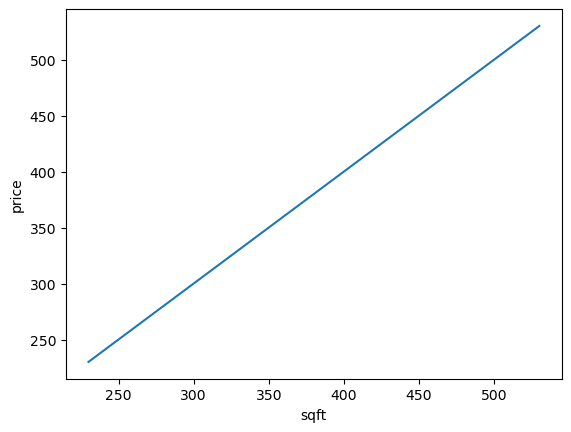

In [25]:
import matplotlib.pyplot as plt
plt.plot(top_five['total_sqft'], top_five['price'])
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()